<a href="https://colab.research.google.com/github/katherine2022Udea/TesisEspecializacion/blob/main/2)AnalisisTiempoSupervivencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) **Contexto del Problema**

La mayoría de nosotros conoce a alguien que luchó contra el cáncer de mama, o al menos escuchó sobre las luchas que enfrentan los pacientes que luchan contra el cáncer de mama. El cáncer de mama es el cáncer más frecuente entre las mujeres y afecta a 2,1 millones de mujeres cada año. El cáncer de mama causa el mayor número de muertes relacionadas con el cáncer entre las mujeres. Solo en 2018, se estima que 627.000 mujeres murieron de cáncer de mama.

La parte más importante de un proceso de toma de decisiones clínicas en pacientes con cáncer, en general, es la estimación precisa del pronóstico y la duración de la supervivencia. Las pacientes con cáncer de mama con la misma etapa de la enfermedad y las mismas características clínicas pueden tener diferentes respuestas al tratamiento y supervivencia general, pero ¿por qué?

Los cánceres están asociados con anomalías genéticas. La expresión genética mide el nivel de actividad genética en un tejido y proporciona información sobre sus actividades complejas. La comparación de los genes expresados ​​en tejido normal y enfermo puede aportar una mejor comprensión del pronóstico y los resultados del cáncer. El uso de técnicas de aprendizaje automático en datos genéticos tiene el potencial de proporcionar la estimación correcta del tiempo de supervivencia y puede evitar procedimientos quirúrgicos y de tratamiento innecesarios.

Objetivo:

*Predecir la supervivencia del cáncer de mama utilizando modelos de aprendizaje automático con datos clínicos y perfiles de expresión génica.
Agrupación de genes*

https://www.kaggle.com/raghadalharbi/breast-cancer-gene-expression-profiles-metabric

In [ ]:
import numpy as np # Matemetias y Matrices
import pandas as pd # para BD
import matplotlib.pyplot as plt # Graficas
import seaborn as sns # Graficas estadisticas
from scipy.stats import shapiro # Pruebas Estadisticas
from scipy.stats import chi2_contingency # Pruebas de Independencia para Tablas de contingencia
from scipy import stats
### Modelación de Machine Learning
from sklearn.model_selection import train_test_split # Para dividir nuesntra BD en entrenamiento y Test
import statsmodels.api as sm
from scipy.stats import normaltest

In [ ]:
!pip install lifelines
from lifelines import KaplanMeierFitter

In [ ]:
url='https://raw.githubusercontent.com/katherine2022Udea/TesisEspecializacion/main/METABRIC_RNA_Mutation.csv'
df=pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
df=df.iloc[:,0:31]

In [ ]:
df.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Mixed,1,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


## **A) Diccionario de Variables**

* patient_id: ID del paciente
* ageatdiagnosis:Edad de la paciente al momento del diagnóstico. 
* typeofbreast_surgery:Tipo de cirugía de cáncer de mama: 1- MASTECTOMÍA, que se refiere a una cirugía para extirpar todo el tejido mamario de una mama como una forma de tratar o prevenir el cáncer de mama. 2- CONSERVADORA DE MAMA, que se refiere a una urgencia donde solo la parte de la mama que tiene cancer se remueve
* cancer_type: Tipos de cáncer de mama: 1- Cáncer de mama o 2- Sarcoma de mama
* cancertypedetailed: Tipos detallados de cáncer de mama: 1- Carcinoma ductal invasivo de mama 2- Carcinoma ductal y lobulillar mixto de mama 3- Carcinoma lobular invasivo de mama 4- Carcinoma mucinoso mixto invasivo de mama 5- Cáncer de mama metaplásico
* cellularity: Celularidad del cáncer después de la quimioterapia, que se refiere a la cantidad de células tumorales en la muestra y su disposición en grupos.
* chemotherapy: Si la paciente recibió quimioterapia como tratamiento (sí / no)
* pam50+claudin-low_subtype: Pam 50: es una prueba de perfil tumoral que ayuda a mostrar si es probable que algunos cánceres de mama con receptores de estrógeno positivos (ER positivos) y HER2 negativos hagan metástasis (cuando el cáncer de mama se disemina a otros órganos). El subtipo de cáncer de mama con claudina baja se define por las características de expresión génica, principalmente: baja expresión de genes de adhesión célula-célula, alta expresión de genes de transición epitelial-mesenquimatosa (EMT) y patrones de expresión génica similares a células madre / menos diferenciados
* cohort: La cohorte es un grupo de sujetos que comparten una característica definitoria (toma un valor de 1 a 5)
* erstatusmeasuredbyihc: Para evaluar si los receptores de estrógeno se expresan en las células cancerosas mediante el uso de inmunohistoquímica (un tinte utilizado en patología que se dirige a un antígeno específico, si está allí, dará un color, no está allí, el tejido del portaobjetos se coloreará ) (positivo negativo)
* er_status: Las células cancerosas son positivas o negativas para los receptores de estrógeno
* neoplasmhistologicgrade: Determinado por patología al observar la naturaleza de las células, se ven agresivas o no (toma un valor de 1 a 3)
* her2statusmeasuredbysnp6: Evaluar si el cáncer es positivo para HER2 o no mediante el uso de técnicas moleculares avanzadas (tipo de secuenciación de próxima generación)
* her2_status: Si el cáncer es positivo o negativo para HER2
* tumorotherhistologic_subtype: Tipo de cáncer basado en el examen microscópico del tejido canceroso (toma un valor de 'Ductal / NST', 'Mixto', 'Lobular', 'Tubular / cribiforme', 'Mucinoso', 'Medular', 'Otro', 'Metaplástico')
* hormone_therapy: Si la paciente tuvo tratamiento hormonal o no (sí / no)
* inferredmenopausalstate: Si la paciente es posmenopáusica o no (post / pre)
* integrative_cluster: Subtipo molecular del cáncer basado en alguna expresión genética (toma un valor de '4ER +', '3', '9', '7', '4ER-', '5', '8', '10', ' 1 ',' 2 ',' 6 ')
* primarytumorlaterality: Ya sea que involucre el seno derecho o el izquierdo
* lymphnodesexamined_positive: Para tomar muestras del ganglio linfático durante la cirugía y ver si estaba involucrado por el cáncer.
* mutation_count: Número de gen que tiene mutaciones relevantes
* nottinghamprognosticindex: Se utiliza para determinar el pronóstico después de una cirugía por cáncer de mama. Su valor se calcula utilizando tres criterios patológicos: el tamaño del tumor; el número de ganglios linfáticos afectados; y el grado del tumor.
* oncotree_code: OncoTree es una ontología de código abierto que se desarrolló en el Memorial Sloan Kettering Cancer Center (MSK) para estandarizar el diagnóstico de tipos de cáncer desde una perspectiva clínica al asignar a cada diagnóstico un código OncoTree único.
* overallsurvivalmonths: Duración desde el momento de la intervención hasta la muerte
* **overall_survival: Variable objetivo si el paciente está vivo o muerto**.
* pr_status: Las células cancerosas son positivas o negativas para los receptores de progesterona
* radio_therapy: Si el paciente recibió radio como tratamiento (sí / no)
* 3-geneclassifiersubtype: Subtipo de clasificador de tres genes Toma un valor de 'ER- / HER2-', 'ER + / HER2- High Prolif', nan, 'ER + / HER2- Low Prolif', 'HER2 +'
* tumor_size: Tamaño del tumor medido por técnicas de imagen.
* Etapa del cáncer según la participación de las estructuras circundantes, los ganglios linfáticos y la diseminación a distancia
* deathfromcancer:Si la muerte del paciente se debió a cáncer o no (sí / no)

In [ ]:
df.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

**Analisis Tiempo Supervivencia**
* Vamos a analizar el efecto chemotherapy: Si la paciente recibió quimioterapia como tratamiento (sí / no)
* overallsurvivalmonths: Duración desde el momento de la intervención hasta la muerte.
* overall_survival: Variable objetivo si el paciente está vivo o muerto.

In [ ]:
df.chemotherapy.value_counts()

0    1508
1     396
Name: chemotherapy, dtype: int64

In [ ]:
pd.crosstab(df.chemotherapy,df.overall_survival)

overall_survival,0,1
chemotherapy,,
0,891,617
1,212,184


In [ ]:
df.death_from_cancer.value_counts()

Living                  801
Died of Disease         622
Died of Other Causes    480
Name: death_from_cancer, dtype: int64

In [ ]:
df.overall_survival.value_counts()

0    1103
1     801
Name: overall_survival, dtype: int64

In [ ]:
Muertes=df[df.chemotherapy==1]
print(Muertes.shape)

(396, 31)


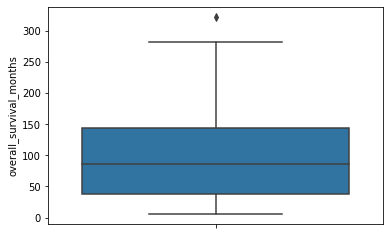

In [ ]:
sns.boxplot(y="overall_survival_months", data=Muertes)
plt.show()

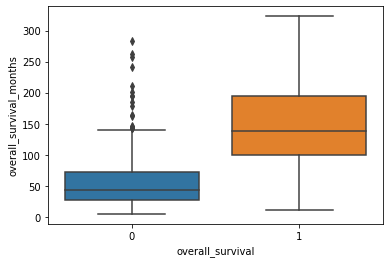

In [ ]:
sns.boxplot(x="overall_survival",y="overall_survival_months", data=Muertes)
plt.show()

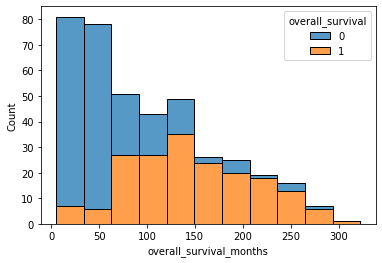

In [ ]:
sns.histplot(data=Muertes, x="overall_survival_months", hue="overall_survival",multiple="stack")
plt.show()

In [ ]:
Muertes.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Mixed,1,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
6,14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,LOSS,Negative,Ductal/NST,1,Post,3,Right,1.0,4.0,4.020,IDC,164.333333,1,Positive,1,NaN,10.0,2.0,Living
12,45,45.27,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,claudin-low,1.0,Negative,Negative,3.0,NEUTRAL,Negative,Ductal/NST,0,Pre,4ER-,Right,3.0,NaN,5.038,IDC,164.900000,1,Positive,1,NaN,19.0,2.0,Living


Hallar el estimador de Kaplan-Meier para la función de supervivencia de todos los individuos juntos, sin importar el grupo. Representarlo en un gráfico. Representar con un símbolo sobre el gráfico anterior los eventos censurados.

In [ ]:
Muertes["E"]=""
Muertes["E"][Muertes.overall_survival==1]=0
Muertes["E"][Muertes.overall_survival==0]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [ ]:
Muertes.groupby("E").agg({"overall_survival_months":"mean"})

,overall_survival_months
E,
0,148.843841
1,60.037579


In [ ]:
kmf=KaplanMeierFitter() # Vacio
kmf.fit(durations=Muertes.overall_survival_months,event_observed=Muertes.E)

/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1188: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 396 total observations, 184 right-censored observations>

**La función de supervivencia de todos los individuos juntos**

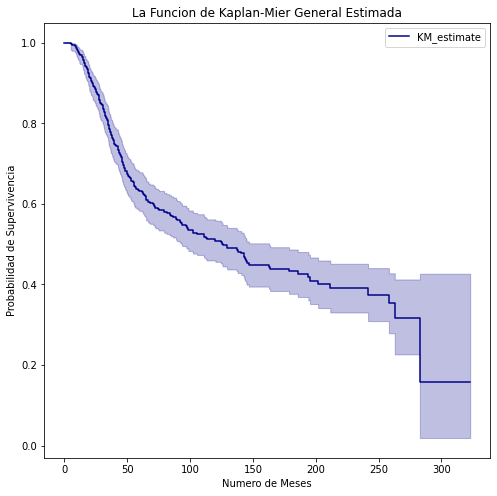

In [ ]:
plt.figure(figsize=(8,8))
kmf.plot(color="darkblue")
plt.title("La Funcion de Kaplan-Mier General Estimada")
plt.xlabel("Numero de Meses")
plt.ylabel("Probabilidad de Supervivencia")
plt.show()

* El promedio de meses, en que mueren las pacientes a nivel general son 300 meses en promedio

In [ ]:
Muertes.hormone_therapy.value_counts()

0    213
1    183
Name: hormone_therapy, dtype: int64

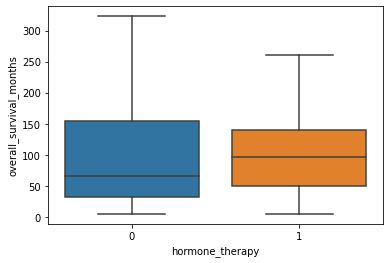

In [ ]:
sns.boxplot(x="hormone_therapy",y="overall_survival_months", data=Muertes)
plt.show()

Ajustar el Modelo por cada Grupo, si la paciente tuvo tratamiento hormonal

In [ ]:
control=Muertes[Muertes.hormone_therapy==0]
tratamiento=Muertes[Muertes.hormone_therapy==1]


In [ ]:
# Modelos Instanciado, Pero Vacion sin ningun Ajuste de Datos
kmf_control=KaplanMeierFitter()
Kmf_tratamiento=KaplanMeierFitter()
# Ajustar Los datos a los Modelos
kmf_control.fit(durations=control.overall_survival_months,event_observed=control.E)
Kmf_tratamiento.fit(durations=tratamiento.overall_survival_months,event_observed=tratamiento.E)

/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1188: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 183 total observations, 92 right-censored observations>

In [ ]:
Mediana_Control=kmf_control.median_survival_time_
print(Mediana_Control)

88.93333333


In [ ]:
Mediana_tratamiento=Kmf_tratamiento.median_survival_time_
print(Mediana_tratamiento)

143.6


In [ ]:
Intervalos_Confianza_Funcion_Supervivencia_Control=kmf_control.confidence_interval_survival_function_
Intervalos_Confianza_Funcion_Supervivencia_Tratamiento=Kmf_tratamiento.confidence_interval_survival_function_

In [ ]:
Intervalos_Confianza_Funcion_Supervivencia_Tratamiento.head(2)

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.000000,1.000000,1.000000
5.066667,0.961848,0.999228


In [ ]:
Intervalos_Confianza_Funcion_Supervivencia_Control.head(3)

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.000000,1.000000,1.000000
5.833333,0.967144,0.999337
8.066667,0.962981,0.997643


In [ ]:
#Grafica Control

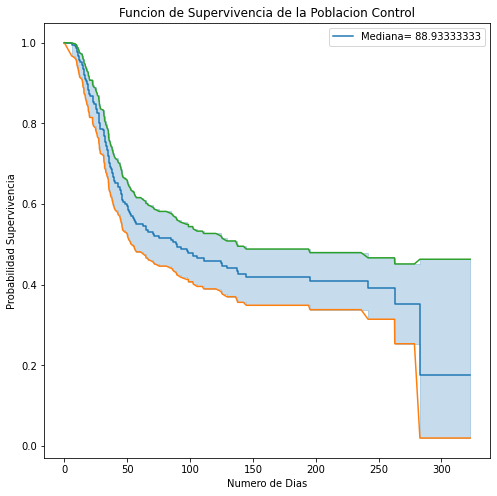

In [ ]:
plt.figure(figsize=(8,8))
kmf_control.plot(label="Mediana= " + str(Mediana_Control))
plt.plot(Intervalos_Confianza_Funcion_Supervivencia_Control["KM_estimate_lower_0.95"],label="Inferior al 95%")
plt.plot(Intervalos_Confianza_Funcion_Supervivencia_Control["KM_estimate_upper_0.95"],label="Superior al 95%")
plt.title("Funcion de Supervivencia de la Poblacion Control")
plt.xlabel("Numero de Dias")
plt.ylabel("Probabilidad Supervivencia")
plt.show()

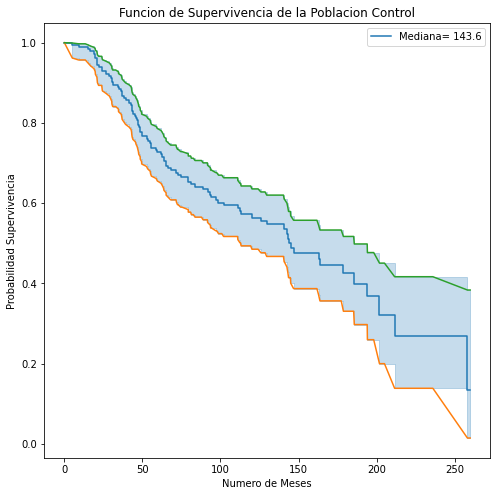

In [ ]:
plt.figure(figsize=(8,8))
Kmf_tratamiento.plot(label="Mediana= " + str(Mediana_tratamiento))
plt.plot(Intervalos_Confianza_Funcion_Supervivencia_Tratamiento["KM_estimate_lower_0.95"],label="Inferior al 95%")
plt.plot(Intervalos_Confianza_Funcion_Supervivencia_Tratamiento["KM_estimate_upper_0.95"],label="Superior al 95%")
plt.title("Funcion de Supervivencia de la Poblacion Control")
plt.xlabel("Numero de Meses")
plt.ylabel("Probabilidad Supervivencia")
plt.show()

In [ ]:
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test

/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1188: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.7/dist-packages/lifelines/utils/__init__.py:1188: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


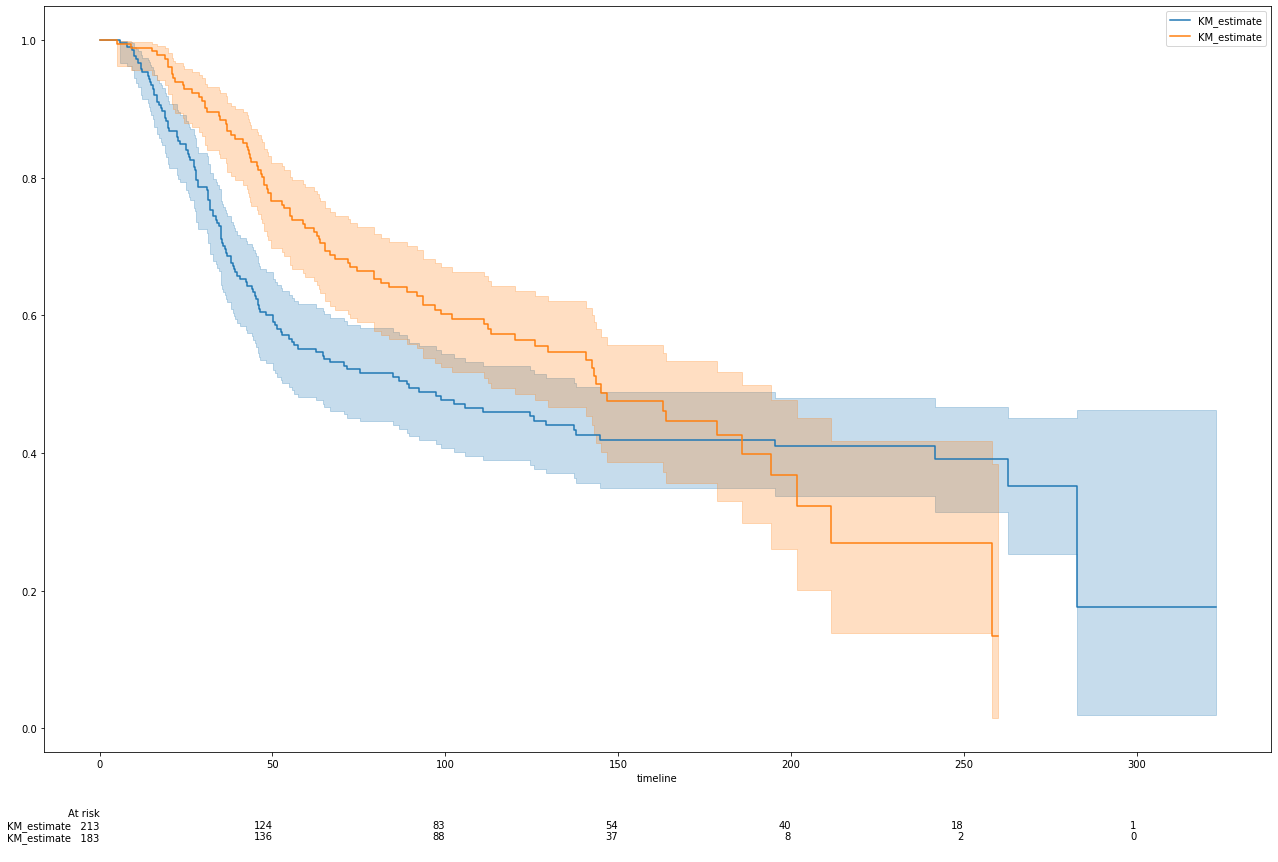

In [ ]:
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(111)
f1=kmf_control.fit(durations=control.overall_survival_months,event_observed=control["E"])
f1.plot(ax=ax)
f2=Kmf_tratamiento.fit(durations=tratamiento.overall_survival_months,event_observed=tratamiento["E"])
f2.plot(ax=ax)
add_at_risk_counts(f1,f2,rows_to_show=['At risk'])
plt.tight_layout()

**Test Estadistico**

In [ ]:
logrank_test(control.overall_survival_months,tratamiento.overall_survival_months,
             event_observed_A=control["E"],event_observed_B=tratamiento["E"])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.97 0.08      3.56

* H0: las probabilidades de supervivencia de los dos Grupos son Iguales
* Ha: las probabilidades de supervivencia de los dos Grupos son Diferentes

* Si el P valor < 0.05, Se rechaza H0

Conclusión las probailidades de supervivencia de los dos grupos de Muestras son diferentes, el número de dias mediano de supervivencia del Grupo control es de 84 meses, mientras que el numero de dias mediano de supervivencia del Grupo con tratamiento hormonal es 168 meses. esto se demuestró estadisticamente
